### Problem Statement:

#### Our clients want to launch a new product and want to understand the reviews of the competitors to see what are the challenges faced by consumers. Hence want to improve the respective features to address the challenges. Thus  the newly launched product should have enhanced features.

### Importing the libraries:

In [391]:
import numpy as np
import pandas as pd
import string
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
from collections import Counter
from textblob import TextBlob
from plotly import graph_objs as go
import plotly.express as px
import text2emotion as te
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()

### Importing the Dataset:

In [392]:
inalsa_data = pd.read_excel("inalsa_data.xlsx")
stok_data = pd.read_excel("stok_data.xlsx")
philips_data = pd.read_excel("philips_data.xlsx")

data = pd.concat([inalsa_data, stok_data, philips_data])
data

Unnamed: 0             Name  \
0              0      SonamGupta    
1              1     Sumit Saxena   
2              2     Ankit Mishra   
3              3     Tushar Arora   
4              4  Amazon Customer   
...          ...              ...   
1841        1841      Mitu Biswas   
1842        1842           Prince   
1843        1843           kishor   
1844        1844            B S R   
1845        1845         Manmohan   

                                           Review_Title              Rating  \
0                       MUST BUY ..... INALASA AIRFRYER  5.0 out of 5 stars   
1                Low Quality/ Pathetic Customer Support  1.0 out of 5 stars   
2                                           Easy to use  5.0 out of 5 stars   
3                            Was almost a great product  2.0 out of 5 stars   
4                     Product has manufacturing defect.  1.0 out of 5 stars   
...                                                 ...                 ...   
1841                                         Five Stars  5.0 out of 5 stars   
1842  Cooks with less oil but carries another health...  3.0 out of 5 stars   
1843  Phillips product waste of money,poor product d...  1.0 out of 5 stars   
1844                                 Philip’s Air Fryer  4.0 out of 5 stars   
1845                                       Good product  5.0 out of 5 stars   

                                        Date  \
0          Reviewed in India on 1 March 2019   
1     Reviewed in India on 29 September 2019   
2      Reviewed in India on 22 February 2019   
3          Reviewed in India on 23 July 2019   
4          Reviewed in India on 4 April 2019   
...                                      ...   
1841   Reviewed in India on 11 November 2014   
1842         Reviewed in India on 7 May 2015   
1843      Reviewed in India on 21 March 2021   
1844       Reviewed in India on 1 March 2021   
1845      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 6 columns]

In [393]:
data["Rating"] = [float(x.rstrip(" out of 5 stars")) for x in data["Rating"]]

data

Unnamed: 0             Name  \
0              0      SonamGupta    
1              1     Sumit Saxena   
2              2     Ankit Mishra   
3              3     Tushar Arora   
4              4  Amazon Customer   
...          ...              ...   
1841        1841      Mitu Biswas   
1842        1842           Prince   
1843        1843           kishor   
1844        1844            B S R   
1845        1845         Manmohan   

                                           Review_Title  Rating  \
0                       MUST BUY ..... INALASA AIRFRYER     5.0   
1                Low Quality/ Pathetic Customer Support     1.0   
2                                           Easy to use     5.0   
3                            Was almost a great product     2.0   
4                     Product has manufacturing defect.     1.0   
...                                                 ...     ...   
1841                                         Five Stars     5.0   
1842  Cooks with less oil but carries another health...     3.0   
1843  Phillips product waste of money,poor product d...     1.0   
1844                                 Philip’s Air Fryer     4.0   
1845                                       Good product     5.0   

                                        Date  \
0          Reviewed in India on 1 March 2019   
1     Reviewed in India on 29 September 2019   
2      Reviewed in India on 22 February 2019   
3          Reviewed in India on 23 July 2019   
4          Reviewed in India on 4 April 2019   
...                                      ...   
1841   Reviewed in India on 11 November 2014   
1842         Reviewed in India on 7 May 2015   
1843      Reviewed in India on 21 March 2021   
1844       Reviewed in India on 1 March 2021   
1845      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 6 columns]

In [394]:
data = data.iloc[:,1:]
data

Name                                       Review_Title  \
0         SonamGupta                     MUST BUY ..... INALASA AIRFRYER   
1        Sumit Saxena             Low Quality/ Pathetic Customer Support   
2        Ankit Mishra                                        Easy to use   
3        Tushar Arora                         Was almost a great product   
4     Amazon Customer                  Product has manufacturing defect.   
...               ...                                                ...   
1841      Mitu Biswas                                         Five Stars   
1842           Prince  Cooks with less oil but carries another health...   
1843           kishor  Phillips product waste of money,poor product d...   
1844            B S R                                 Philip’s Air Fryer   
1845         Manmohan                                       Good product   

      Rating                                    Date  \
0        5.0       Reviewed in India on 1 March 2019   
1        1.0  Reviewed in India on 29 September 2019   
2        5.0   Reviewed in India on 22 February 2019   
3        2.0       Reviewed in India on 23 July 2019   
4        1.0       Reviewed in India on 4 April 2019   
...      ...                                     ...   
1841     5.0   Reviewed in India on 11 November 2014   
1842     3.0         Reviewed in India on 7 May 2015   
1843     1.0      Reviewed in India on 21 March 2021   
1844     4.0       Reviewed in India on 1 March 2021   
1845     5.0      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 5 columns]

<AxesSubplot:>

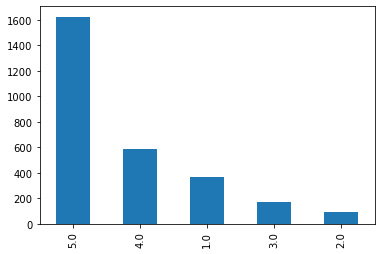

In [395]:
data["Rating"].value_counts().plot.bar()

### Just taking the review column:

In [396]:
data = data.loc[:, data.columns == "Review_content"]
data.reset_index(inplace = True)
data = data.iloc[:, 1:]
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

In [397]:
# Turning all reviews to string as one was float -_-
data["Review_content"] = [str(x) for x in data["Review_content"]]
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

### Cleaning the text:

In [398]:
reviews = [x for x in data["Review_content"] if x] #removes empty fields
reviews

['  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT ........ PREPARED FOOD IS VERY DELICIOUS . THANKYOU .... INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES ....',
 "  Earlier I gave a positive review, but after using it for 1 month I would like to take back all the good things I said about the product.It is indeed cheap and the polish of the tray is coming off.What is more disappointing is their customer service, who doesn't have any credibility. They make fake commitments all the time whenever contacted.All the best if you've also purchased this item.Unfortunate Buyer,Sumit Saxena",
 '  Inalsa Air Fryer...this is awesome product ...10/10Value for money 10/10Philips vs inalsa ...inalsa10/10',
 '  I bought this in the prime day sale on 15th July,  only by the brand value, as inalsa products are great value for money as we also have other products of them. On my first try for this product i tried using mccain potato cubes in this. I start

In [399]:
#Turning the list of words in one para
text = ' '.join(reviews)
text

'  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT ........ PREPARED FOOD IS VERY DELICIOUS . THANKYOU .... INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES ....   Earlier I gave a positive review, but after using it for 1 month I would like to take back all the good things I said about the product.It is indeed cheap and the polish of the tray is coming off.What is more disappointing is their customer service, who doesn\'t have any credibility. They make fake commitments all the time whenever contacted.All the best if you\'ve also purchased this item.Unfortunate Buyer,Sumit Saxena   Inalsa Air Fryer...this is awesome product ...10/10Value for money 10/10Philips vs inalsa ...inalsa10/10   I bought this in the prime day sale on 15th July,  only by the brand value, as inalsa products are great value for money as we also have other products of them. On my first try for this product i tried using mccain potato cubes in this. I started the frye

In [400]:
# removing punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text[0:500]

'  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT  PREPARED FOOD IS VERY DELICIOUS  THANKYOU  INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES    Earlier I gave a positive review but after using it for 1 month I would like to take back all the good things I said about the productIt is indeed cheap and the polish of the tray is coming offWhat is more disappointing is their customer service who doesnt have any credibility They make fake commitments a'

### Tokenization:

In [401]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['IT', 'IS', 'MORE', 'THAN', 'VALUE', 'FOR', 'MONEY', 'HAPPY', 'WITH', 'THE', 'PRODUCT', 'PREPARED', 'FOOD', 'IS', 'VERY', 'DELICIOUS', 'THANKYOU', 'INALSA', 'AND', 'AMAZON', 'FOR', 'PROVIDING', 'SUCH', 'A', 'GOOD', 'PRODUCT', 'TO', 'START', 'OUR', 'DAY', 'WITH', 'OIL', 'FREE', 'DISHES', 'Earlier', 'I', 'gave', 'a', 'positive', 'review', 'but', 'after', 'using', 'it', 'for', '1', 'month', 'I', 'would', 'like']


In [402]:
## Run this line of code if you do not have the punkt package installed
# import nltk
# nltk.download('punkt') 

In [403]:
# converting all the text to lower capitalization
text_tokens_lower = []
for word in text_tokens:
    text_tokens_lower.append(word.lower())
print(text_tokens_lower[0:50])

['it', 'is', 'more', 'than', 'value', 'for', 'money', 'happy', 'with', 'the', 'product', 'prepared', 'food', 'is', 'very', 'delicious', 'thankyou', 'inalsa', 'and', 'amazon', 'for', 'providing', 'such', 'a', 'good', 'product', 'to', 'start', 'our', 'day', 'with', 'oil', 'free', 'dishes', 'earlier', 'i', 'gave', 'a', 'positive', 'review', 'but', 'after', 'using', 'it', 'for', '1', 'month', 'i', 'would', 'like']


In [404]:
len(text_tokens) 

61224

In [405]:
# Importing more stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [406]:
# removing all the stop words
no_stop_tokens = [word for word in text_tokens_lower if not word in stopwords]
print(no_stop_tokens[0:40])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dishes', 'earlier', 'gave', 'positive', 'review', 'using', '1', 'month', 'would', 'like', 'take', 'back', 'good', 'things', 'said', 'productit', 'indeed', 'cheap', 'polish', 'tray', 'coming', 'offwhat', 'disappointing']


In [407]:
len(no_stop_tokens)

35067

### Stemming:

In [408]:
porter = PorterStemmer()

stemmed_words = [porter.stem(word) for word in no_stop_tokens]
print(stemmed_words[0:25])

['valu', 'money', 'happi', 'product', 'prepar', 'food', 'delici', 'thankyou', 'inalsa', 'amazon', 'provid', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish', 'earlier', 'gave', 'posit', 'review', 'use', '1', 'month']


### Lemmatization:

In [409]:
wnl = WordNetLemmatizer()

lemmas = [wnl.lemmatize(word) for word in no_stop_tokens]
print(lemmas[0:25])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish', 'earlier', 'gave', 'positive', 'review', 'using', '1', 'month']


### Parts Of Speech:

In [410]:
pos_tagged = nltk.pos_tag(no_stop_tokens)
pos_tagged

pos_tagged_df = pd.DataFrame(pos_tagged, columns=["Word", "POS"])
pos_tagged_df

Word  POS
0         value   NN
1         money   NN
2         happy   JJ
3       product   NN
4      prepared  VBN
...         ...  ...
35062      easy   JJ
35063       use   NN
35064      food   NN
35065     comes  VBZ
35066      good   JJ

[35067 rows x 2 columns]

### Count Vectorizing:

In [411]:
# Counting how many times the words are come in the leammatized list
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [412]:
print(vectorizer.vocabulary_)

{'value': 4840, 'money': 2867, 'happy': 2142, 'product': 3486, 'prepared': 3429, 'food': 1818, 'delicious': 1282, 'thankyou': 4490, 'inalsa': 2301, 'amazon': 336, 'providing': 3587, 'good': 2018, 'start': 4264, 'day': 1223, 'oil': 3049, 'free': 1871, 'dish': 1388, 'earlier': 1471, 'gave': 1979, 'positive': 3385, 'review': 3855, 'using': 4821, 'month': 2875, 'would': 5058, 'like': 2609, 'take': 4406, 'back': 489, 'thing': 4513, 'said': 3912, 'productit': 3516, 'indeed': 2325, 'cheap': 840, 'polish': 3367, 'tray': 4638, 'coming': 972, 'offwhat': 3045, 'disappointing': 1375, 'customer': 1198, 'service': 4024, 'doesnt': 1419, 'credibility': 1164, 'make': 2706, 'fake': 1694, 'commitment': 977, 'time': 4561, 'whenever': 4983, 'contactedall': 1064, 'best': 565, 'youve': 5098, 'also': 315, 'purchased': 3599, 'itemunfortunate': 2435, 'buyersumit': 744, 'saxena': 3946, 'air': 274, 'fryerthis': 1935, 'awesome': 473, '1010value': 9, '1010philips': 8, 'inalsa1010': 2302, 'bought': 653, 'prime': 346

#### Ngram:

In [413]:
# taking meaningful words that are together
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(reviews)

In [414]:
print(vectorizer_ngram_range.get_feature_names())
bow_matrix_ngram

['after', 'air', 'air fryer', 'all', 'also', 'am', 'amazon', 'an', 'and', 'are', 'as', 'at', 'be', 'best', 'but', 'buy', 'by', 'can', 'chicken', 'clean', 'cook', 'cooking', 'easy', 'easy to', 'easy to use', 'excellent', 'food', 'for', 'french', 'fried', 'fries', 'from', 'fry', 'fryer', 'good', 'good product', 'great', 'happy', 'has', 'have', 'healthy', 'if', 'in', 'in the', 'is', 'it', 'it is', 'its', 'just', 'less', 'like', 'made', 'money', 'more', 'must', 'my', 'nice', 'no', 'not', 'of', 'of the', 'oil', 'on', 'one', 'only', 'or', 'out', 'philips', 'price', 'product', 'product is', 'quality', 'really', 'so', 'taste', 'that', 'the', 'the product', 'there', 'this', 'this product', 'time', 'to', 'to use', 'too', 'tried', 'use', 'used', 'using', 'very', 'very good', 'was', 'we', 'well', 'which', 'will', 'with', 'without', 'working', 'you']


<2836x100 sparse matrix of type '<class 'numpy.int64'>'
	with 26759 stored elements in Compressed Sparse Row format>

### TFID Vectorizer:

In [415]:
# TFID Vectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(reviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '15', 'about', 'absolutely', 'after', 'again', 'air', 'air fryer', 'air fryer is', 'airfryer', 'all', 'all the', 'almost', 'also', 'am', 'amazing', 'amazing product', 'amazon', 'an', 'and', 'and clean', 'and easy', 'and easy to', 'and is', 'and it', 'and the', 'any', 'appliance', 'are', 'as', 'as it', 'as the', 'as well', 'at', 'at all', 'available', 'avoid', 'awesome', 'awesome product', 'back', 'bad', 'baking', 'basket', 'be', 'because', 'been', 'been using', 'before', 'best', 'better', 'big', 'bit', 'book', 'booklet', 'bought', 'bought it', 'bought this', 'box', 'brand', 'broken', 'but', 'but it', 'but the', 'buy', 'buying', 'by', 'came', 'came out', 'can', 'can be', 'card', 'care', 'chicken', 'chips', 'clean', 'cleaning', 'coil', 'come', 'comes', 'company', 'condition', 'conscious', 'consumption', 'convenient', 'cook', 'cooked', 'cooking', 'cooks', 'cost', 'could', 'crispy', 'customer', 'damaged', 'day', 'days', 'deep', 'defective', 'delivered', 'delivery', 'device', 'did', 

In [416]:
# making a para from lemas list
lemma_para = ' '.join(lemmas)

### Wordcloud of whole data:

In [417]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

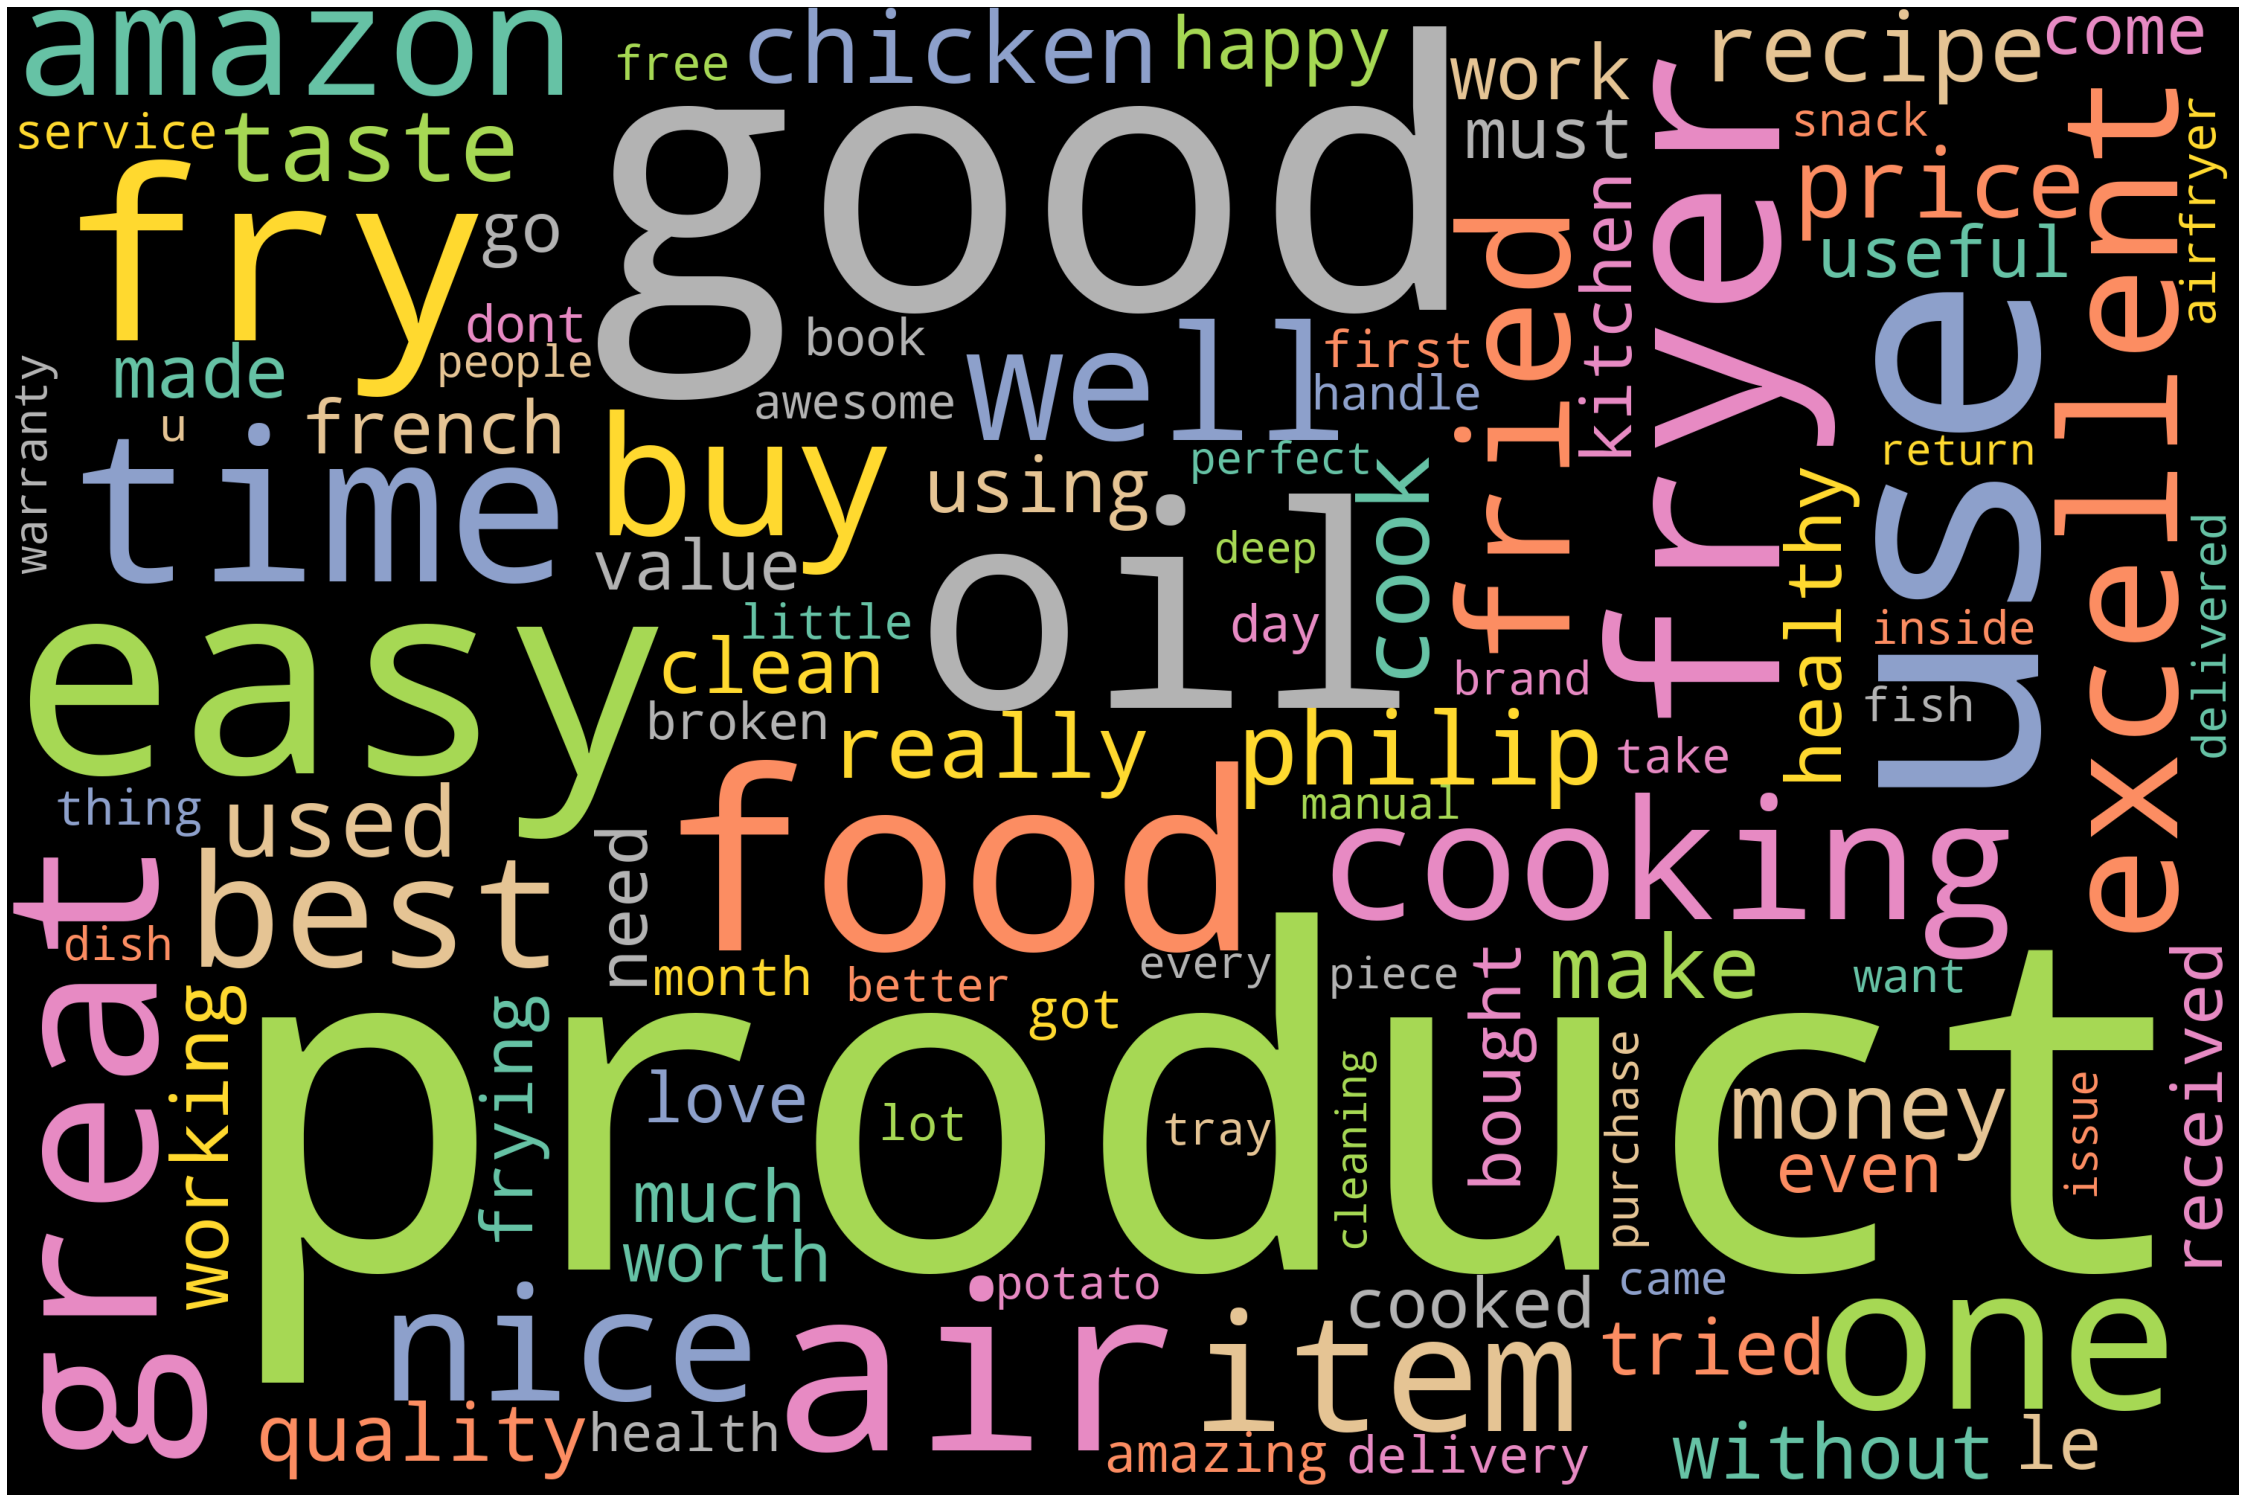

In [418]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords, collocations=False).generate(lemma_para)
# Plot
plot_cloud(wordcloud)

### Sentiment Analysis:

In [419]:
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

In [420]:
def sentiment_analyzer(text):
    '''Creating TextBlob object'''
    blob = TextBlob(text)
    return blob.sentiment[0]

In [421]:
# Creating column in dataframe

sentiments = []

for x in data["Review_content"]:
    if sentiment_analyzer(x) > 0:
        sentiments.append("Positive")
    elif sentiment_analyzer(x) < 0:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")
        
data["Sentiment"] = sentiments

data

Review_content Sentiment
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive
1       Earlier I gave a positive review, but after ...  Positive
2       Inalsa Air Fryer...this is awesome product ....  Positive
3       I bought this in the prime day sale on 15th ...  Positive
4       Product has manufacturing defect as the righ...  Positive
...                                                 ...       ...
2831                                              Great  Positive
2832    Oil free or less cooking is always good for ...  Positive
2833    it was waste of money & not cooking properly...  Negative
2834                Good Product, easy to use to clean.  Positive
2835    Your browser does not support HTML5 video.\n...  Positive

[2836 rows x 2 columns]

### Checking if people are positive or negative in the reviews:

<AxesSubplot:>

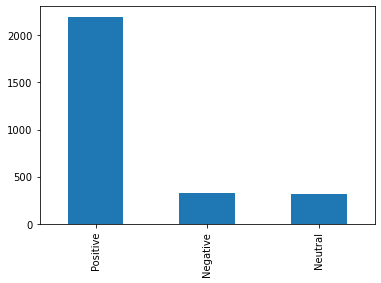

In [422]:
data["Sentiment"].value_counts().plot.bar()

In [423]:
textblob_values = data["Sentiment"].value_counts()

textblob_numbers = [x for x in textblob_values]

In [424]:
fig = go.Figure(go.Funnelarea(
    text = textblob_values.keys(),
    values = textblob_numbers,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

#### Sentiment analysis using nltk:

In [425]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [426]:
vader_scores = []
for index in range(len(data["Review_content"])):
    score = sid.polarity_scores(data["Review_content"][index])
    if score["pos"] > score["neg"]:
        vader_scores.append("Positive")
    elif score["pos"] < score["neg"]:
        vader_scores.append("Negative")
    else:
        vader_scores.append("Neutral")

data["Sentiment_VADER"] = vader_scores
data    

Review_content Sentiment  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1       Earlier I gave a positive review, but after ...  Positive   
2       Inalsa Air Fryer...this is awesome product ....  Positive   
3       I bought this in the prime day sale on 15th ...  Positive   
4       Product has manufacturing defect as the righ...  Positive   
...                                                 ...       ...   
2831                                              Great  Positive   
2832    Oil free or less cooking is always good for ...  Positive   
2833    it was waste of money & not cooking properly...  Negative   
2834                Good Product, easy to use to clean.  Positive   
2835    Your browser does not support HTML5 video.\n...  Positive   

     Sentiment_VADER  
0           Positive  
1           Positive  
2           Positive  
3           Negative  
4           Negative  
...              ...  
2831        Positive  
2832        Positive  
2833        Negative  
2834        Positive  
2835        Positive  

[2836 rows x 3 columns]

<AxesSubplot:>

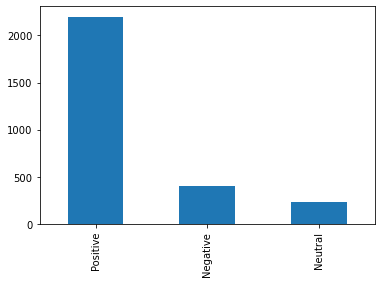

In [427]:
data["Sentiment_VADER"].value_counts().plot.bar()

In [428]:
values_vader = data["Sentiment_VADER"].value_counts()

values_vader_numbers = [x for x in values_vader]

In [429]:
fig = go.Figure(go.Funnelarea(
    text = values_vader.keys(),
    values = values_vader_numbers,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

##### We can see that more people are positive about these products. Thats good news for our client!!

### Emotion Mining:

In [430]:
# approx 10 mins to run
emotion_list = []
line_number = 1

loading = 1
print("Computer takes time to understand feeling of humans! Please wait for some time :)\n")
print("Loading (wait till completes 100):")
for line in data["Review_content"]:
    if line_number == int(loading * (len(data["Review_content"]) / 100)):
    
        print(loading, end="..")
        loading += 1
    
    emotion_list.append(te.get_emotion(line))
    line_number += 1

print("Done!\n\nThat took some time! Humans are difficult to understand :P")

Computer takes time to understand feeling of humans! Please wait for some time :)

Loading (wait till completes 100):
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..26..27..28..29..30..31..32..33..34..35..36..37..38..39..40..41..42..43..44..45..46..47..48..49..50..51..52..53..54..55..56..57..58..59..60..61..62..63..64..65..66..67..68..69..70..71..72..73..74..75..76..77..78..79..80..81..82..83..84..85..86..87..88..89..90..91..92..93..94..95..96..97..98..99..100..Done!

That took some time! Humans are difficult to understand :P


In [431]:
var = list(emotion_list[0].keys())
for item in var:
    data[item] = [x[item] for x in emotion_list]
data

Review_content Sentiment  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1       Earlier I gave a positive review, but after ...  Positive   
2       Inalsa Air Fryer...this is awesome product ....  Positive   
3       I bought this in the prime day sale on 15th ...  Positive   
4       Product has manufacturing defect as the righ...  Positive   
...                                                 ...       ...   
2831                                              Great  Positive   
2832    Oil free or less cooking is always good for ...  Positive   
2833    it was waste of money & not cooking properly...  Negative   
2834                Good Product, easy to use to clean.  Positive   
2835    Your browser does not support HTML5 video.\n...  Positive   

     Sentiment_VADER  Happy  Angry  Surprise   Sad  Fear  
0           Positive   0.80   0.00      0.00  0.20  0.00  
1           Positive   0.08   0.08      0.31  0.31  0.23  
2           Positive   0.00   0.00      1.00  0.00  0.00  
3           Negative   0.16   0.12      0.22  0.19  0.31  
4           Negative   0.00   0.00      0.00  0.25  0.75  
...              ...    ...    ...       ...   ...   ...  
2831        Positive   1.00   0.00      0.00  0.00  0.00  
2832        Positive   0.25   0.00      0.00  0.50  0.25  
2833        Negative   0.40   0.00      0.40  0.20  0.00  
2834        Positive   1.00   0.00      0.00  0.00  0.00  
2835        Positive   0.50   0.00      0.50  0.00  0.00  

[2836 rows x 8 columns]

### Emotions of first 10 users respective to the Fryer product:

<AxesSubplot:>

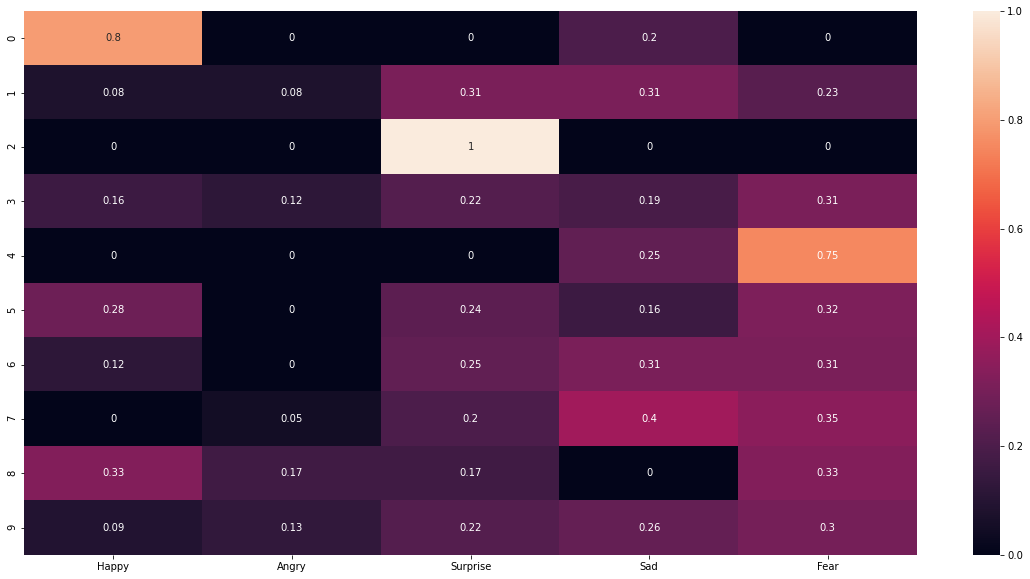

In [432]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data.iloc[:10,3:], annot=True)

### Most appearing words in Positive, Negative & Neutral reviews:

In [433]:
positive_reviews = data[data['Sentiment_VADER']=='Positive']
negative_reviews = data[data['Sentiment_VADER']=='Negative']
neutral_reviews = data[data['Sentiment_VADER']=='Neutral']

In [434]:
positive_reviews

Review_content Sentiment  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1       Earlier I gave a positive review, but after ...  Positive   
2       Inalsa Air Fryer...this is awesome product ....  Positive   
5       My friend has this Inalsa air fryer since ov...  Positive   
6       Excellent way for cooking for veg and Non-ve...  Positive   
...                                                 ...       ...   
2830                                      thank you!!!!   Neutral   
2831                                              Great  Positive   
2832    Oil free or less cooking is always good for ...  Positive   
2834                Good Product, easy to use to clean.  Positive   
2835    Your browser does not support HTML5 video.\n...  Positive   

     Sentiment_VADER  Happy  Angry  Surprise   Sad  Fear  
0           Positive   0.80   0.00      0.00  0.20  0.00  
1           Positive   0.08   0.08      0.31  0.31  0.23  
2           Positive   0.00   0.00      1.00  0.00  0.00  
5           Positive   0.28   0.00      0.24  0.16  0.32  
6           Positive   0.12   0.00      0.25  0.31  0.31  
...              ...    ...    ...       ...   ...   ...  
2830        Positive   0.00   0.00      0.00  0.00  0.00  
2831        Positive   1.00   0.00      0.00  0.00  0.00  
2832        Positive   0.25   0.00      0.00  0.50  0.25  
2834        Positive   1.00   0.00      0.00  0.00  0.00  
2835        Positive   0.50   0.00      0.50  0.00  0.00  

[2198 rows x 8 columns]

In [435]:
def text_cleanup(data):
    '''Returning a lemmatized word para and a DataFrame of words and their counts'''
    reviews = [x for x in data if x] # Removing empty fields
    text = ' '.join(reviews) # Making the list into para
    no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #removing punctuation
    text_tokens = word_tokenize(no_punc_text) # tokenizing
    
    # turning tokenzied words to lowercase
    text_tokens_lower = []
    for word in text_tokens:
        text_tokens_lower.append(word.lower())
        
    # Removing Stop words    
    no_stop_tokens = [word for word in text_tokens_lower if not word in stopwords]
    
    # Lemmatinzing the words
    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in no_stop_tokens]    
    
    # Making lematized string
    lemma_para = ' '.join(lemmas)
    
    # counting of lemmas
    words_counter = Counter(lemmas)

    sorted_list_desc = list(sorted(words_counter.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
    max_words_df = pd.DataFrame(sorted_list_desc[:20],columns=["common_words", "count"])

    max_words_df
    
    return lemma_para , max_words_df

In [436]:
def most_common_words(data,type=""):
    '''Plotting most common words'''
    fig = px.bar(data, x="count", y="common_words", title=f'Most Commmon Words in {type} reviews', orientation='h', 
             width=700, height=700,color='common_words')
    fig.show()

In [437]:
positive_lemma_para , positive_lemmas_counts_df = text_cleanup(positive_reviews["Review_content"])

In [438]:
most_common_words(positive_lemmas_counts_df, "Positive") 

### Positive Words Wordcloud:

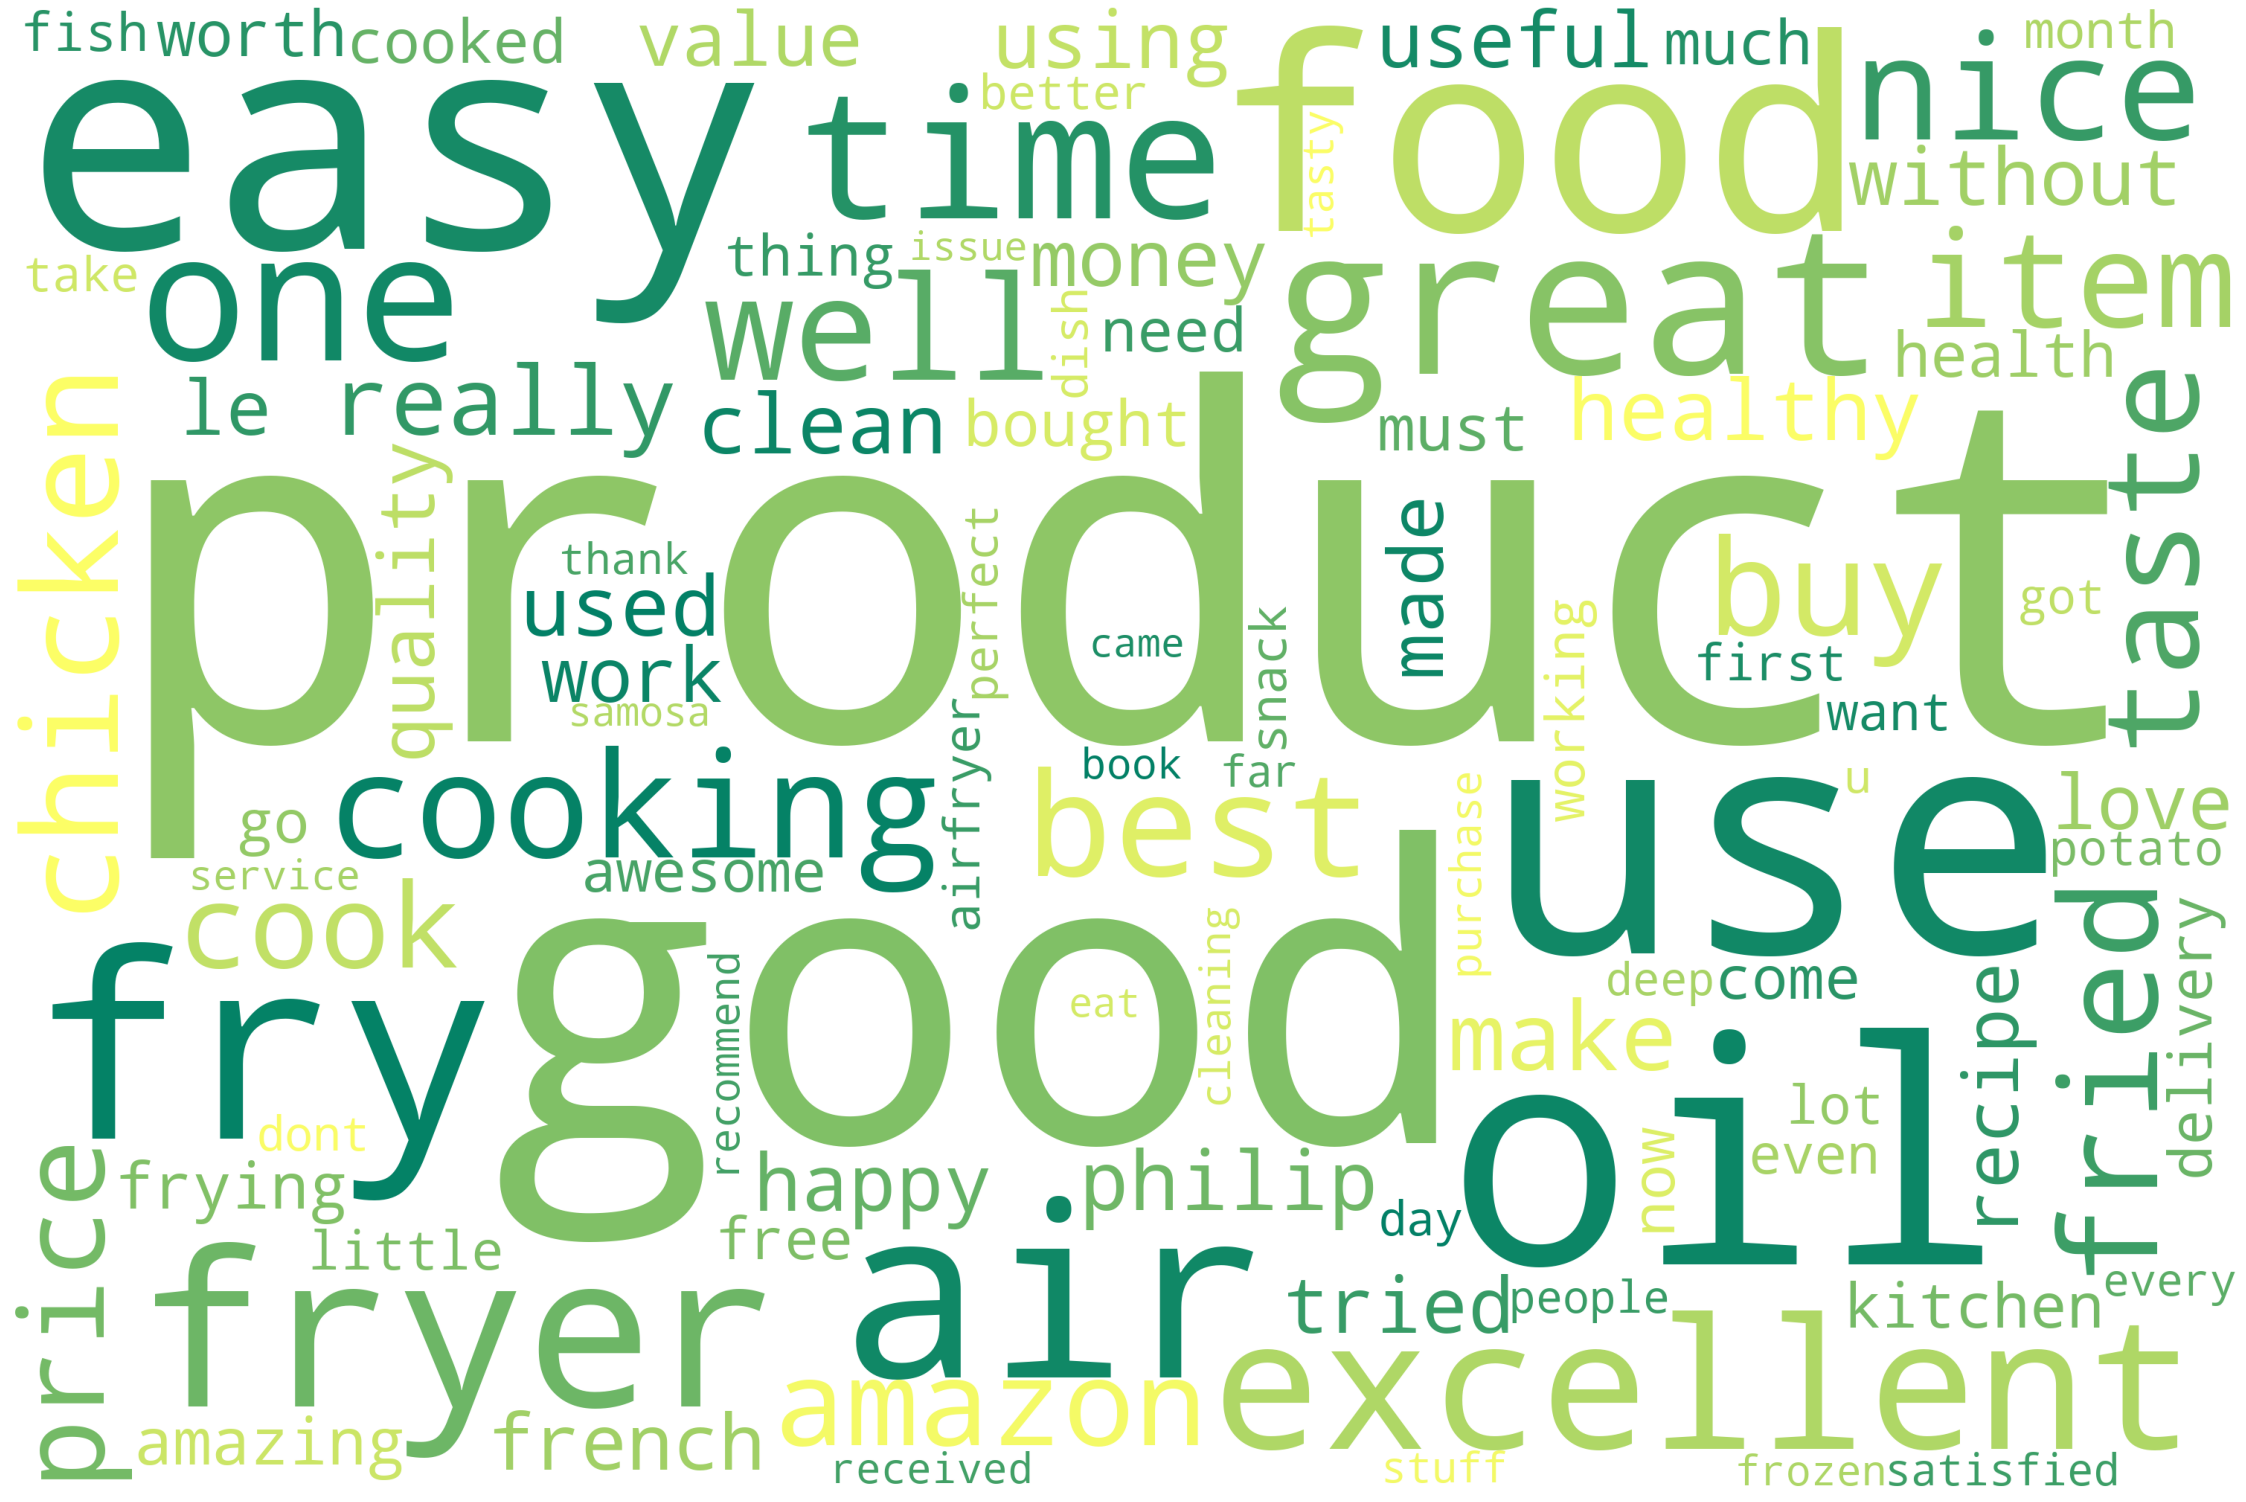

In [439]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='White', max_words=100,colormap='summer',stopwords=stopwords, collocations=False).generate(positive_lemma_para)
# Plot
plot_cloud(wordcloud)

In [440]:
negative_lemma_para , negative_lemmas_counts_df = text_cleanup(negative_reviews["Review_content"])

In [441]:
most_common_words(negative_lemmas_counts_df, "Negative")

### Negative Words Wordcloud:

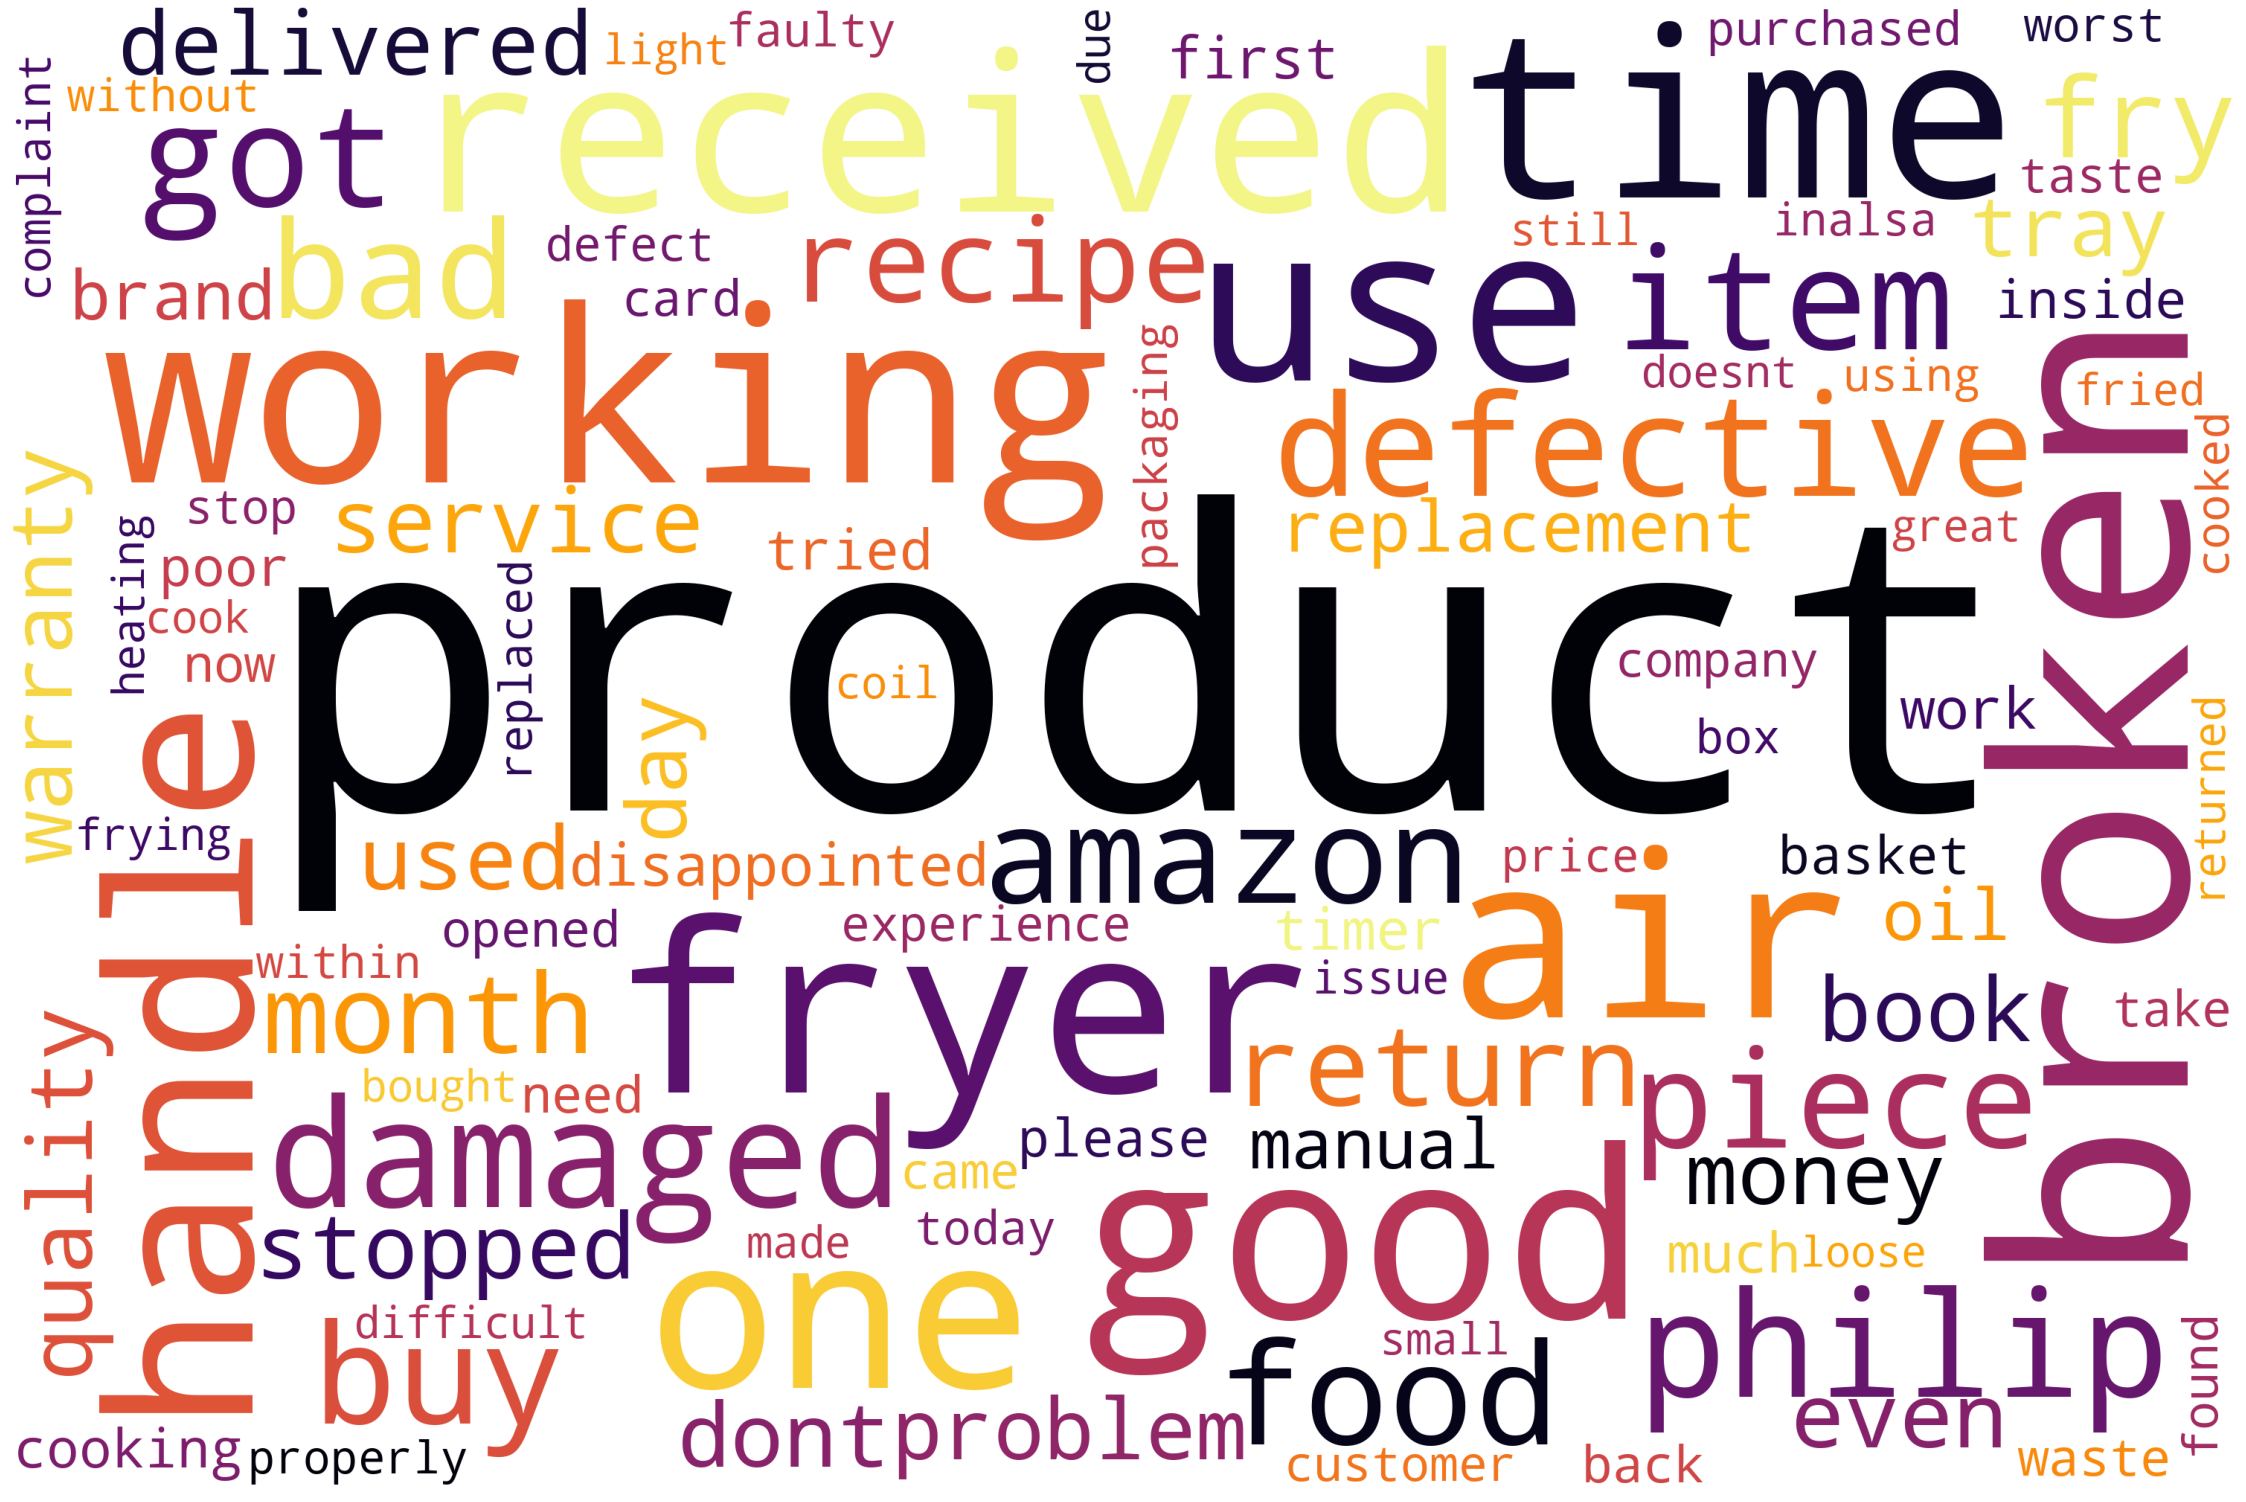

In [442]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color="White", max_words=100,colormap='inferno_r',stopwords=stopwords, collocations=False).generate(negative_lemma_para)
# Plot
plot_cloud(wordcloud)

In [443]:
neutral_lemma_para , neutral_lemmas_counts_df = text_cleanup(neutral_reviews["Review_content"])

In [444]:
most_common_words(neutral_lemmas_counts_df, "Neutral")

### Neutral Words Wordcloud:

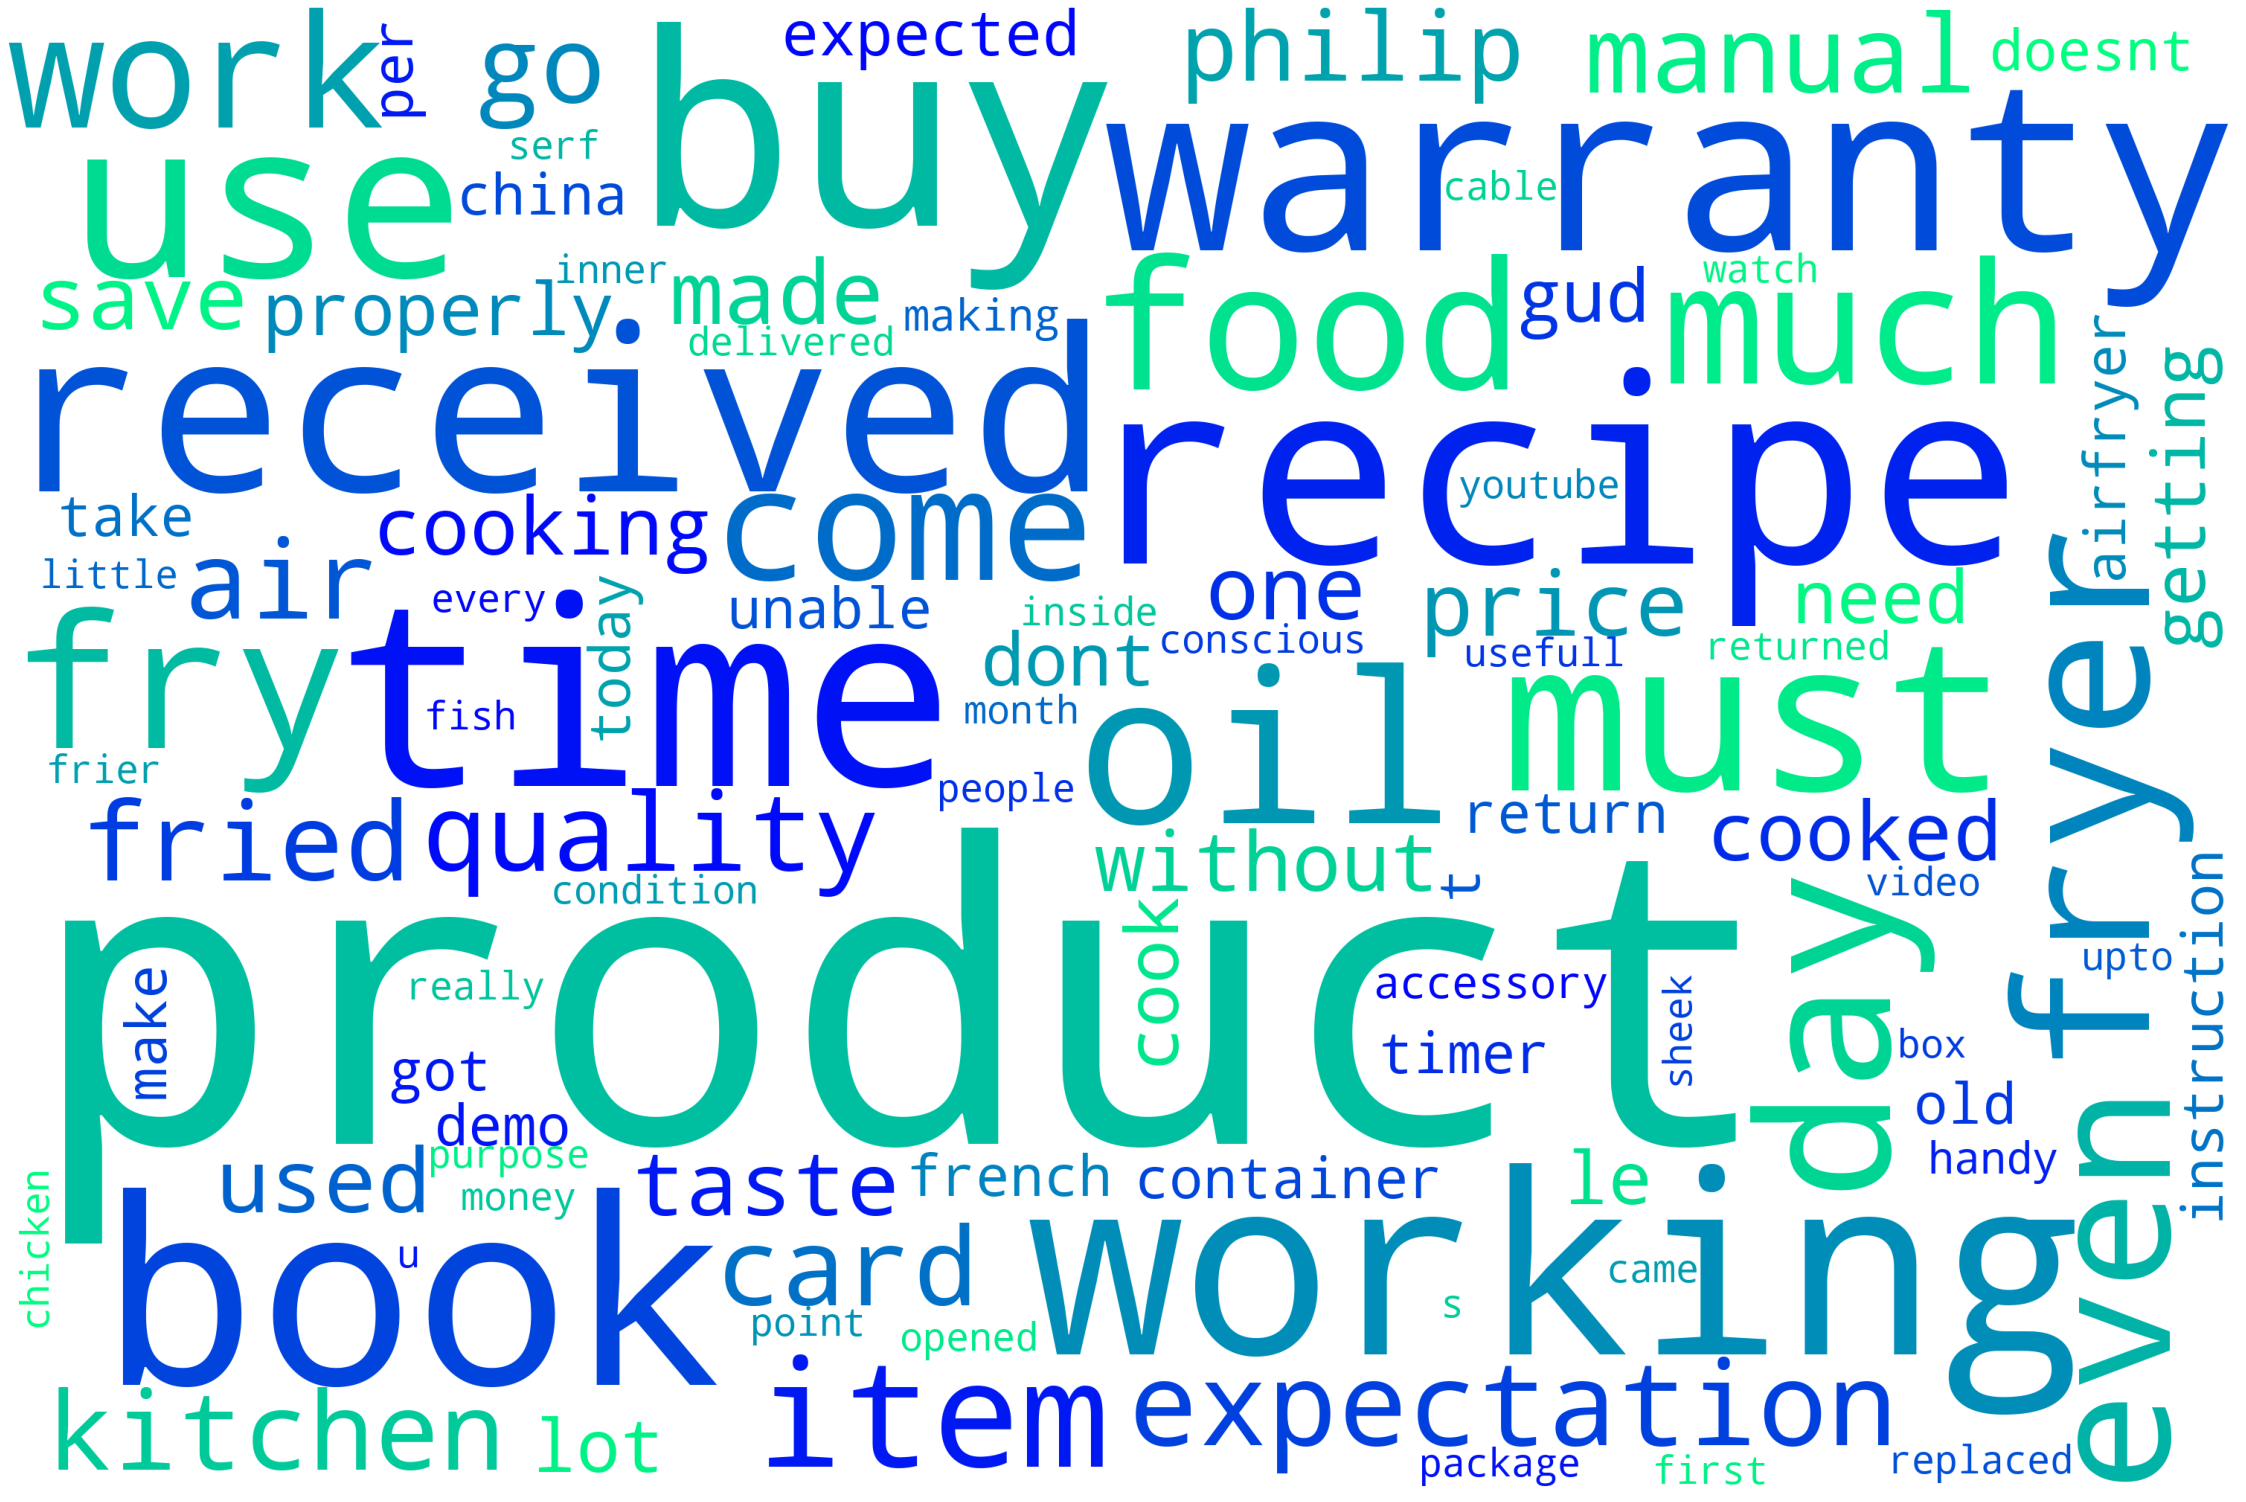

In [445]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color="White", max_words=100,colormap='winter',stopwords=stopwords, collocations=False).generate(neutral_lemma_para)
# Plot
plot_cloud(wordcloud)

###### Our client can now take decisions based on these reviews and words that are frequently occuring

###### He can use the emotion dataframe to check what makes the customer angry or happy